In [1]:
#@@@@@@@@@@@@@@@@@@@@@@@
#import useful libraries
#@@@@@@@@@@@@@@@@@@@@@@@
import pandas as pd
import numpy as np
import copy
from scipy import interpolate
from scipy.stats import truncnorm
import pickle
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from pydantic import BaseModel
import csv
import os
import torch
import torch.nn as nn
import torch.optim as optim
from typing import List
import time

from game import TheGang
from models import HandFeatures

In [43]:
def simulate_random(episodes: int):
    env = TheGang()
    average_episode_rewards = []
    for epi in tqdm(range(episodes)):
        env.reset()

        episode_rewards = []
        episode_states = []
        episode_actions = []
        state = {'state':env.generate_state_array([0,0,0,0]),'reward':[0,0,0,0],'done':False}

        # Loop turns in episode
        while not state['done']:
            episode_states.append(state['state'])

            a = list(np.random.random_integers(1, 4, 4))

            episode_actions.append(a)
            state = env.step(a)
            episode_rewards.append(state['reward'])
        average_episode_rewards.append(np.mean(episode_rewards))
    return average_episode_rewards

In [44]:
rewards = simulate_random(1000)
print(np.mean(rewards))

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Josh\AppData\Local\Temp\ipykernel_12460\94726479.py:16: DeprecationWarning: This function is deprecated. Please call randint(1, 4 + 1) instead
  a = list(np.random.random_integers(1, 4, 4))
100%|██████████| 1000/1000 [00:07<00:00, 127.45it/s]


24.2446875


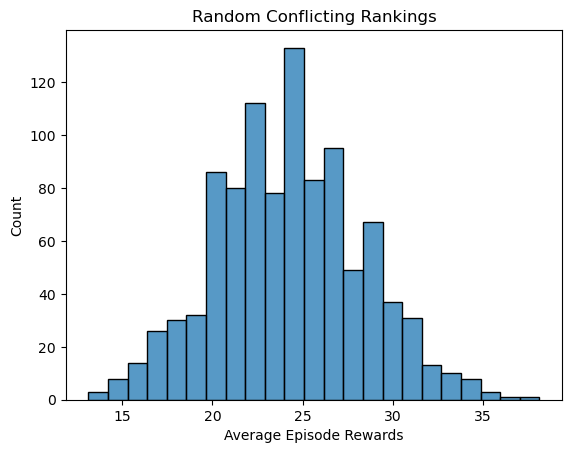

In [45]:
sns.histplot(rewards)
plt.xlabel("Average Episode Rewards")
plt.title("Random Conflicting Rankings")
plt.savefig("Random_Conflicting.svg", format="svg")
plt.show()

In [40]:
def simulate_random_non_repeating(episodes: int):
    env = TheGang()
    average_episode_rewards = []
    for epi in tqdm(range(episodes)):
        env.reset()

        episode_rewards = []
        episode_states = []
        episode_actions = []
        state = {'state':env.generate_state_array([0,0,0,0]),'reward':[0,0,0,0],'done':False}

        # Loop turns in episode
        while not state['done']:
            episode_states.append(state['state'])

            a = []
            actions_left = [1, 2, 3, 4]
            for _ in range(4):
                action = np.random.choice(actions_left)
                actions_left.remove(action)
                a.append(action)

            episode_actions.append(a)
            state = env.step(a)
            episode_rewards.append(state['reward'])
        average_episode_rewards.append(np.mean(episode_rewards))
    return average_episode_rewards

In [41]:
rewards = simulate_random_non_repeating(1000)
print(np.mean(rewards))

100%|██████████| 1000/1000 [00:08<00:00, 123.50it/s]


24.4834375


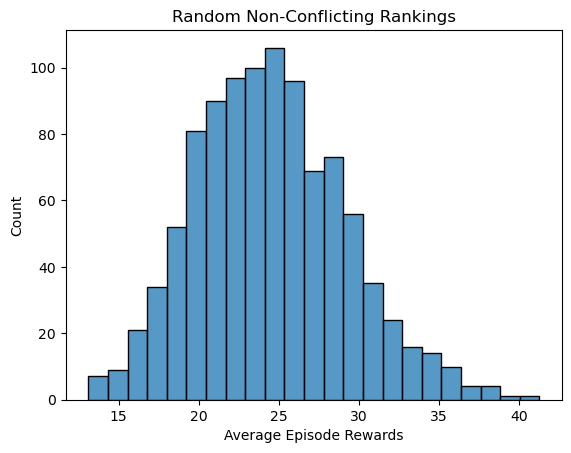

In [42]:
sns.histplot(rewards)
plt.xlabel("Average Episode Rewards")
plt.title("Random Non-Conflicting Rankings")
plt.savefig("Random_Non_Conflicting.svg", format="svg")
plt.show()

In [35]:
def simulate_all_single_action(episodes: int, action: int):
    env = TheGang()
    average_episode_rewards = []
    for epi in tqdm(range(episodes)):
        env.reset()

        episode_rewards = []
        episode_states = []
        episode_actions = []
        state = {'state':env.generate_state_array([0,0,0,0]),'reward':[0,0,0,0],'done':False}

        # Loop turns in episode
        while not state['done']:
            episode_states.append(state['state'])

            a = [action]*4

            episode_actions.append(a)
            state = env.step(a)
            episode_rewards.append(state['reward'])
        average_episode_rewards.append(np.mean(episode_rewards))
    return average_episode_rewards

In [36]:
rewards = simulate_all_single_action(1000, 1)
print(np.mean(rewards))

100%|██████████| 1000/1000 [00:07<00:00, 131.96it/s]


21.25


In [37]:
rewards = simulate_all_single_action(1000, 2)
print(np.mean(rewards))

100%|██████████| 1000/1000 [00:07<00:00, 132.87it/s]

27.5


In [38]:
rewards = simulate_all_single_action(1000, 3)
print(np.mean(rewards))

100%|██████████| 1000/1000 [00:07<00:00, 133.26it/s]

27.5


In [39]:
rewards = simulate_all_single_action(1000, 4)
print(np.mean(rewards))

100%|██████████| 1000/1000 [00:07<00:00, 131.13it/s]

21.25
